# ANCOVA sensitivity indices

In this example we are going to use the ANCOVA decomposition to estimate sensitivity indices from a model with correlated inputs.

ANCOVA allows to estimate the Sobol' indices, and thanks to a functional decomposition of the model it allows to separate the part of variance explained by a variable itself from the part of variance explained by a correlation which is due to its correlation with the other input parameters.


In theory, ANCOVA indices range is $\left[0; 1\right]$ ; the closer to 1 the index is,
the greater the model response sensitivity to the variable is.
These indices are a sum of a physical part $S_i^U$ and correlated part $S_i^C$.
The correlation has a weak influence on the contribution of $X_i$, if $|S_i^C|$
is low and $S_i$ is close to $S_i^U$.
On the contrary, the correlation has a strong influence on the contribution of
the input $X_i$, if $|S_i^C|$ is high and $S_i$ is close to $S_i^C$.

The ANCOVA indices $S_i$ evaluate the importance of one variable at a time
($d$ indices stored, with $d$ the input dimension of the model).
The $d$ uncorrelated parts of variance of the output due to each input $S_i^U$
and the effects of the correlation are represented by the indices resulting
from the subtraction of these two previous lists.

To evaluate the indices, the library needs of a functional chaos result
approximating the model response with uncorrelated inputs and a sample with
correlated inputs used to compute the real values of the output.


In [47]:
from __future__ import print_function
import openturns as ot

In [48]:
# Create the model (x1,x2) --> (y) = (4.*x1+5.*x2)
model = ot.SymbolicFunction(['x1', 'x2'], ['4.*x1+5.*x2'])

In [49]:
# Create the input independent joint distribution
distribution = ot.Normal(2)
distribution.setDescription(['X1', 'X2'])

In [50]:
# Create the correlated input distribution
S = ot.CorrelationMatrix(2)
S[1, 0] = 0.3
R = ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(S)
copula = ot.NormalCopula(R)
distribution_corr = ot.ComposedDistribution([ot.Normal()] * 2, copula)

In [51]:
# ANCOVA needs a functional decomposition of the model
enumerateFunction = ot.EnumerateFunction(2)
productBasis = ot.OrthogonalProductPolynomialFactory([ot.HermiteFactory()]*2, enumerateFunction)
adaptiveStrategy = ot.FixedStrategy(productBasis, enumerateFunction.getStrataCumulatedCardinal(4))
samplingSize = 250
projectionStrategy = ot.LeastSquaresStrategy(ot.MonteCarloExperiment(samplingSize))
algo = ot.FunctionalChaosAlgorithm(model, distribution, adaptiveStrategy, projectionStrategy)
algo.run()
result = ot.FunctionalChaosResult(algo.getResult())

In [52]:
# Create the input sample taking account the correlation
size = 2000
sample = distribution_corr.getSample(size)

In [53]:
# Perform the decomposition
ancova = ot.ANCOVA(result, sample)
# Compute the ANCOVA indices (first order and uncorrelated indices are computed together)
indices = ancova.getIndices()
# Retrieve uncorrelated indices
uncorrelatedIndices = ancova.getUncorrelatedIndices()
# Retrieve correlated indices:
correlatedIndices = indices - uncorrelatedIndices

In [54]:
# Print Sobol' indices, the physical part, and the correlation part
print("ANCOVA indices ", indices)
print("ANCOVA uncorrelated indices ", uncorrelatedIndices)
print("ANCOVA correlated indices ", correlatedIndices)

ANCOVA indices  [0.415981,0.584019]
ANCOVA uncorrelated indices  [0.30781,0.475848]
ANCOVA correlated indices  [0.108171,0.108171]


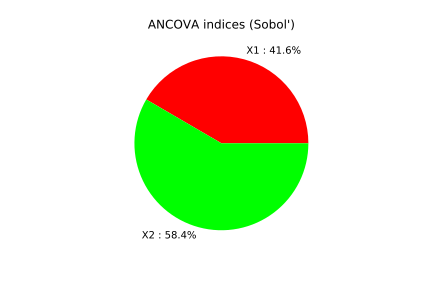

In [55]:
ot.SobolIndicesAlgorithm.DrawImportanceFactors(indices, distribution.getDescription(), 'ANCOVA indices (Sobol\')')

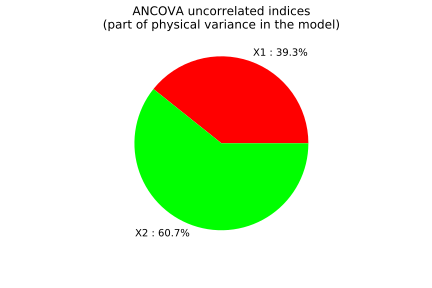

In [56]:
ot.SobolIndicesAlgorithm.DrawImportanceFactors(uncorrelatedIndices, distribution.getDescription(), 'ANCOVA uncorrelated indices\n(part of physical variance in the model)')

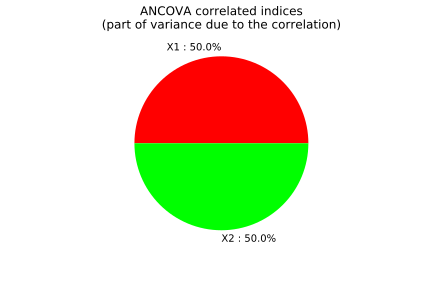

In [57]:
ot.SobolIndicesAlgorithm.DrawImportanceFactors(correlatedIndices, distribution.getDescription(), 'ANCOVA correlated indices\n(part of variance due to the correlation)')